# 제품 이상여부 판별 프로젝트

## 1. 데이터 불러오기


### 필수 라이브러리


In [9]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns

### 데이터 읽어오기


In [2]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train = pd.read_csv(os.path.join(ROOT_DIR, "train_junhyeok.csv"))
test = pd.read_csv('./data/test_junhyeok.csv')

In [3]:
# ratio 확인 함수
def abnormal_ratio(crosstab_left, crosstab_right):
    a = pd.crosstab(crosstab_left, crosstab_right).reset_index()
    a['total'] = a['AbNormal'] + a['Normal']
    a['ratio'] = a['AbNormal'] / (a['total'])
    return a

In [8]:
abnormal_ratio(train['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'], train['target'])

target,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,AbNormal,Normal,total,ratio
0,549.455276,25,801,826,0.030266
1,549.544724,4,22,26,0.153846
2,549.944724,21,822,843,0.024911
3,549.955276,19,470,489,0.038855
4,550.044724,647,6624,7271,0.088984
5,550.055276,0,2,2,0.000000
6,550.255276,210,2622,2832,0.074153
7,550.444724,15,431,446,0.033632
8,550.544724,111,1152,1263,0.087886
9,550.655276,75,1832,1907,0.039329


<Axes: xlabel='HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', ylabel='Count'>

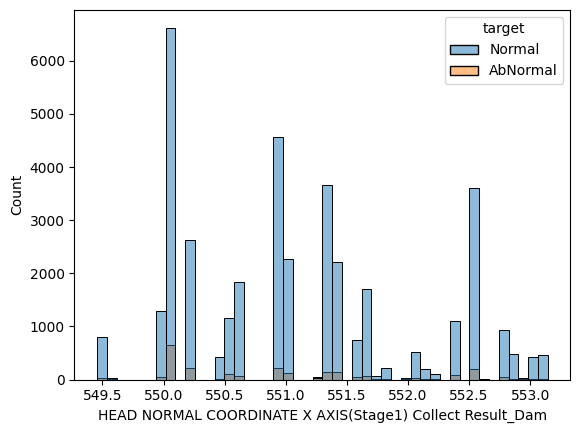

In [10]:
sns.histplot(data = train, x = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', hue = 'target')